# 说明
数据集来自美国威斯康星州的乳腺癌诊断数据集，医疗人员采集了患者乳腺肿块经过细针穿刺 (FNA) 后的数字化图像，并且对这些数字图像进行了特征提取，这些特征可以描述图像中的细胞核呈现。肿瘤可以分成良性和恶性。  

本项目采用机器学习分类算法里的支持向量机 SVM 来对数据集进行分类和预测；在项目的最后，还会采用线性 SVM 分类器来进行分类预测，比较两个分类器的预测效果。

## 数据探索

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)  # 显示所有列
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 图表正常显示中文
import seaborn as sns

from sklearn import svm  # 支持向量机
from sklearn.model_selection import train_test_split  # 划分训练集和测试集
from sklearn.preprocessing import StandardScaler  # 规范化
from sklearn import metrics  # 评估函数


Bad key "text.kerning_factor" on line 4 in
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv(r"data.csv", dtype={u'id': str})  # id这一列是字符串
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


字段及含义

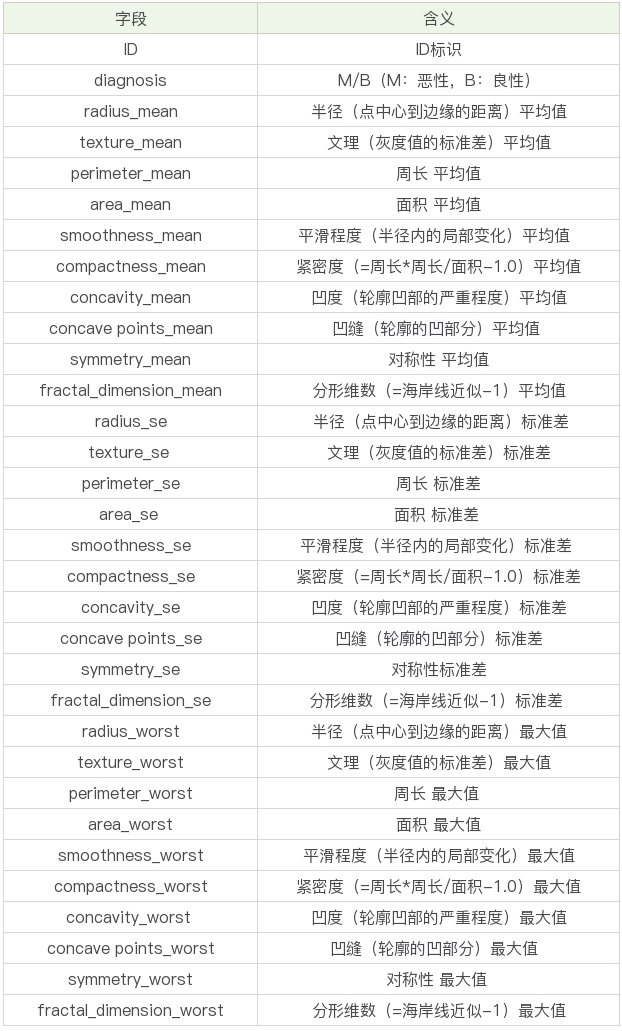

In [3]:
data.columns  # 查看有那些字段

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
data.shape

(569, 32)

除去 'id', 'diagnosis' 两个字段外，数据集有30个特征

In [5]:
data.describe()  # 查看数值型的信息

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


可以看出，每个字段的范围差异很大，后面需要进行规范化处理

In [6]:
data.describe(include='O')  # 查看字符串类型的信息

,id,diagnosis
count,569,569
unique,569,2
top,9110720,B
freq,1,357


In [7]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

## 数据清洗
'diagnosis'特征值是字符串，不方便后续的运算，转成数值类型

In [8]:
# 将特征字段分成3组
features_mean = list(data.columns[2:12])  # 平均值
features_se = list(data.columns[12:22])  # 标准差
features_worst = list(data.columns[22:32])  # 最大值

# ID列没有用，删除该列
data.drop('id', axis=1, inplace=True)

# 将B良性替换为0，M恶性替换为1
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})
data['diagnosis'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [9]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

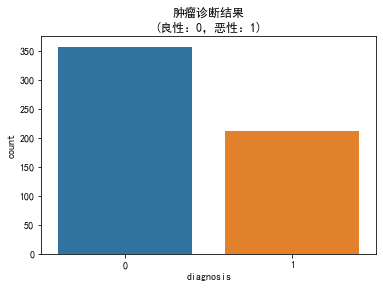

In [10]:
# 将肿瘤诊断结果可视化
plt.title('肿瘤诊断结果\n(良性：0，恶性：1)')
sns.countplot(data['diagnosis'], label='count')

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


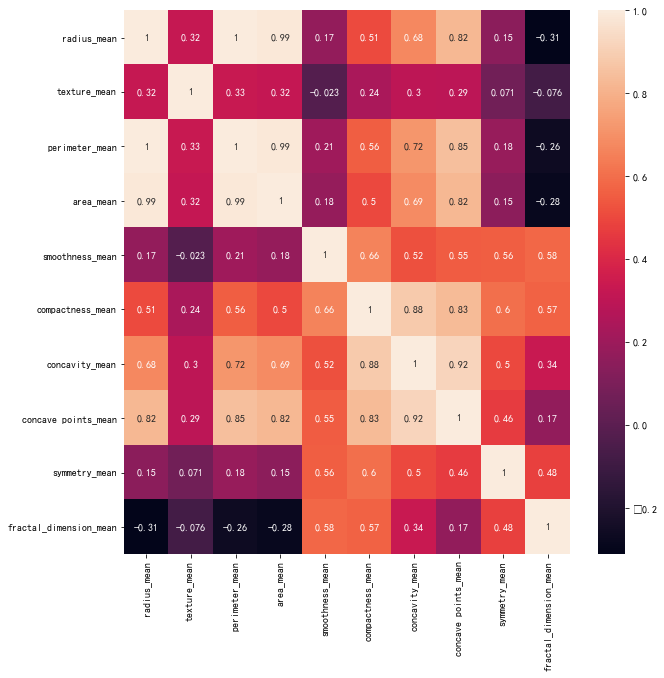

In [11]:
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features_mean].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)   # annot=True显示每个方格的数据

可以看出，radius_mean、perimeter_mean 和 area_mean 三个字段之间的相关系数接近1，说明相关性非常大；compactness_mean、concavity_mean、concave_points_mean 三个字段之间的相关系数在0.9左右，相关性也很强。

## 特征选择

特征选择的目的是降维，用少量的特征代表数据的特性，这样也可以增强分类器的泛化能力，避免数据过拟合。
平均值、标准差和最大值，这三组特征是对同一组内容的不同度量方式，我们可以保留平均值 这组特征，在特征选择中忽略掉标准差和最大值。  
另外，热力图中相关性很强的几个字段，特征选择取其中的一个。

In [12]:
features_remain = ['radius_mean', 'texture_mean', 'smoothness_mean',
                   'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

## 准备训练集和测试集

In [13]:
# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size=0.3)

# 抽取特征选择的数值作为训练和测试数据
train_x = train[features_remain]
train_y = train['diagnosis']

test_x = test[features_remain]
test_y = test['diagnosis']

## 数据规范化

对数据进行规范化，这样让数据同在同一个量级上，避免因为维度问题造成数据误差

In [14]:
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()

# 将特征向量转化为特征值矩阵
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [15]:
train_x[:2]

array([[-0.7362918 , -0.18843866, -0.83897149, -0.88681253, -1.11307045,
        -0.62169935],
       [-0.52760636, -0.75638241, -1.14435778, -0.6182758 , -0.55875808,
        -1.17204391]])

In [16]:
test_x[:2]

array([[ 5.00914703e-01,  1.01107770e-02,  1.95945148e+00,
         2.52944337e+00,  2.04026943e+00,  1.87129002e+00],
       [-2.68240182e-01,  6.08067815e-01,  2.15328672e-02,
        -3.33979298e-04, -2.68753598e-01, -1.67129043e-01]])

## SVM 做训练和预测

In [17]:
# 创建SVM分类器。
model = svm.SVC()

# 用训练集做训练
model.fit(train_x, train_y)

# 用测试集做预测
prediction = model.predict(test_x)
score = metrics.accuracy_score(test_y, prediction)

print('SVC 的准确率为：{}'.format(score))

SVC 的准确率为：0.9473684210526315


准确率大于 90%，说明训练结果还不错。

# 模型探索
## 采用 SVM 线性分类器 LinearSVC，看下分类器的准确度

In [18]:
# 创建SVM线性分类器
model_line = svm.LinearSVC()

# 用训练集做训练
model_line.fit(train_x, train_y)

# 用测试集做预测
prediction_line = model_line.predict(test_x)
score_line = metrics.accuracy_score(test_y, prediction_line)

print('LinearSVC 准确率：{}'.format(score_line))

LinearSVC 准确率：0.9415204678362573


D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


经过对比可以看出，在这个项目里，SVC 的准确率高于 LinearSVC

# 总结

在这个项目里，我们采用 SVM(支持向量机)对乳腺癌数据集进行分类和预测，整个执行的流程，包括数据加载、数据探索、数据清洗、特征选择、SVM 训练和结果评估等环节。本项目数据集的特征比较多，总共有30个，并且部分特征值之间有很强的相关性，所以我们给数据降维，只选取必要的几个特征来进行分析。  

我们不知道数据集是否为线性，所以直接使用 SVC 类来创建 SVM 分类器。SVC默认的高斯核函数，可以将样本映射到高维空间，从而使数据变得线性可分。  

另外，由于数据每个特征之间的值，有很大的差异，为了使数据可以在同一个维度上进行比较，在训练数据之前，我们需要对数据进行规范化。  

项目的最后，我们采用 SVM 线性分类器 LinearSVC 来对数据进行分类和预测，可以看出，在这个项目里，SVC 的准确率高于 LinearSVC。